<a href="https://colab.research.google.com/github/lazy-wolf/python-class-notes/blob/main/Project_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Group Project Code**

```
# Authoured by: Wasim Dawood Shaik, Aastha Dawar
# UNB ID: 3744476, 3737216
# Date: 29-11-2023
```

**Import Libraries**

In [59]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU
from keras.layers import Dropout
from keras.models import load_model
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import itertools
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

**Mounting Google Drive in Google Colab**

In [2]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


**Dataset selection**

In [3]:
dataframe = pd.read_csv("/content/drive/MyDrive/TME_6015/Project/BTC-USD.csv")

**Dataset Info**

[Bitcoin-USD datset download source](https://finance.yahoo.com/quote/BTC-USD/history?period1=1410825600&period2=1700956800&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true)

*https://finance.yahoo.com/quote/BTC-USD/history?period1=1410825600&period2=1700956800&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true*

In [4]:
dataframe.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


In [5]:
dataframe.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3352,2023-11-21,37469.16016,37631.14063,35813.81250,35813.81250,35813.81250,2.517216e+10
3353,2023-11-22,35756.55469,37856.98047,35670.97266,37432.33984,37432.33984,2.439725e+10
3354,2023-11-23,37420.43359,37643.91797,36923.86328,37289.62109,37289.62109,1.421495e+10
3355,2023-11-24,37296.31641,38415.33984,37261.60547,37720.28125,37720.28125,2.292296e+10
3356,2023-11-25,37721.41406,37892.42969,37617.41797,37796.79297,37796.79297,9.099571e+09


In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3357 entries, 0 to 3356
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3357 non-null   object 
 1   Open       3357 non-null   float64
 2   High       3357 non-null   float64
 3   Low        3357 non-null   float64
 4   Close      3357 non-null   float64
 5   Adj Close  3357 non-null   float64
 6   Volume     3357 non-null   float64
dtypes: float64(6), object(1)
memory usage: 183.7+ KB


In [7]:
dataframe.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3357.000000,3357.000000,3357.000000,3357.000000,3357.000000,3.357000e+03
mean,14280.733942,14617.408292,13917.086255,14290.522958,14290.522958,1.648368e+10
std,16024.100730,16413.765412,15585.277279,16024.424885,16024.424885,1.916332e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,898.171997,913.184021,879.807007,899.072998,899.072998,1.477750e+08
50%,8169.060059,8296.694336,7944.776855,8180.479980,8180.479980,1.100281e+10
75%,23150.929690,23578.650390,22747.835940,23164.318360,23164.318360,2.689636e+10
max,67549.734380,68789.625000,66382.062500,67566.828130,67566.828130,3.509680e+11


In [8]:
dataframe.columns.tolist()

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [9]:
dataframe.shape

(3357, 7)

In [10]:
print(f"Columns : {dataframe.shape[1]} || Rows : {dataframe.shape[0]}")

Columns : 7 || Rows : 3357


In [11]:
na_values = dataframe.isna().values.sum()
null_values = dataframe.isnull().values.sum()
print(f"NA Values : {na_values} || Null Values : {null_values}")

NA Values : 0 || Null Values : 0


In [12]:
print(f"Dataset -> Start Date : {dataframe.iloc[0,0]} || End Date : {dataframe.iloc[-1,0]}")

Dataset -> Start Date : 2014-09-17 || End Date : 2023-11-25


In [13]:
dataframe['Date'] = pd.to_datetime(dataframe['Date'])

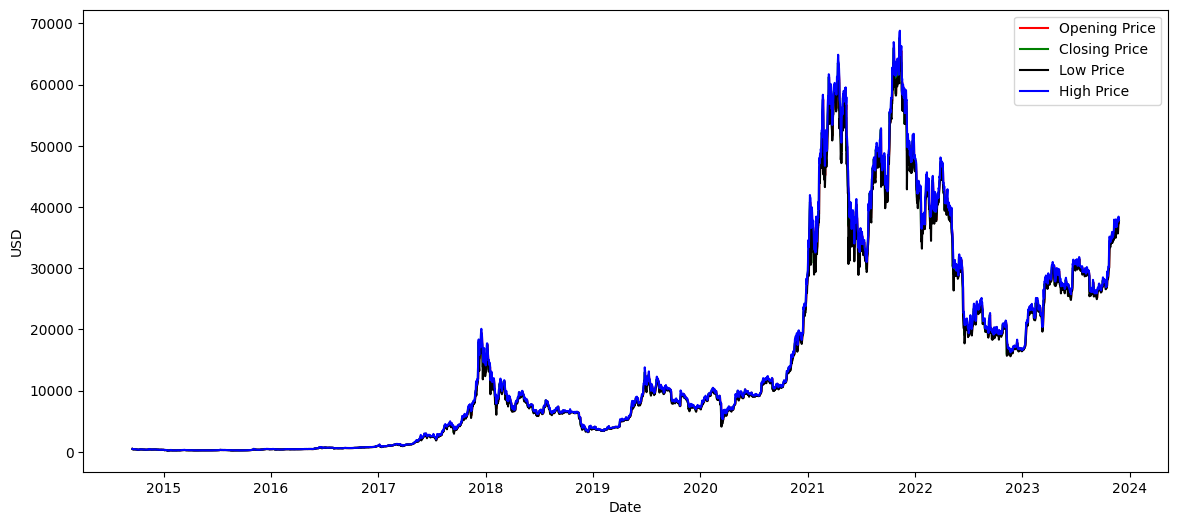

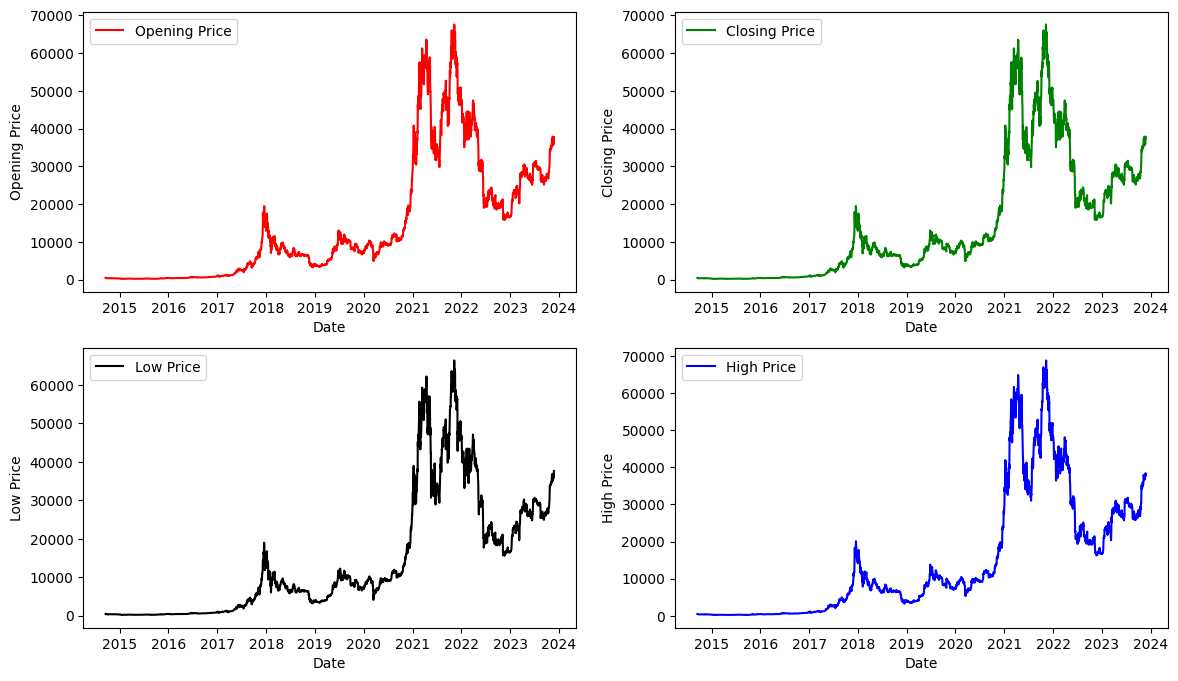

In [14]:
plt.figure(figsize=(14,6), dpi= 100, facecolor='w', edgecolor='k')

plt.plot(dataframe['Date'], dataframe['Open'], color='red', label = 'Opening Price')
plt.plot(dataframe['Date'], dataframe['Close'], color='green', label = 'Closing Price')
plt.plot(dataframe['Date'], dataframe['Low'], color='black', label = 'Low Price')
plt.plot(dataframe['Date'], dataframe['High'], color='blue', label = 'High Price')
plt.xlabel('Date')
plt.ylabel('USD')
plt.title('Bitcoin Prices FY 2014-2023')
plt.legend(loc='best')

plt.subplots(2, 2, figsize = (14, 8))

ax1 = plt.subplot(2, 2, 1)
plt.plot(dataframe['Date'], dataframe['Open'], color='red', label = 'Opening Price')
plt.xlabel('Date')
plt.ylabel('Opening Price')
plt.title('Bitcoin Opening Prices FY 2014-2023')
plt.legend(loc='best')

ax2 = plt.subplot(2, 2, 2)
plt.plot(dataframe['Date'], dataframe['Close'], color='green', label = 'Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Bitcoin Closing Prices FY 2014-2023')
plt.legend(loc='best')

ax3 = plt.subplot(2, 2, 3)
plt.plot(dataframe['Date'], dataframe['Low'], color='black', label = 'Low Price')
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.title('Bitcoin Low Prices FY 2014-2023')
plt.legend(loc='best')

ax4 = plt.subplot(2, 2, 4)
plt.plot(dataframe['Date'], dataframe['High'], color='blue', label = 'High Price')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.title('Bitcoin High Prices FY 2014-2023')
plt.legend(loc='best')

plt.show()

**Data Pre-processing**

In [15]:
final_dataframe = dataframe.drop(['Date','Open', 'Low', 'High','Adj Close'], axis=1)

In [16]:
final_dataframe.head()

,Close,Volume
0,457.334015,21056800.0
1,424.440002,34483200.0
2,394.795990,37919700.0
3,408.903992,36863600.0
4,398.821014,26580100.0


**Min-Max Scaler**

In [17]:
scalar = MinMaxScaler(feature_range=(0, 1))
dataframe_scaled = scalar.fit_transform(final_dataframe)

In [18]:
dataframe_scaled.shape

(3357, 2)

In [19]:
dataframe_scaled[0,:]

array([4.14358659e-03, 4.31449169e-05])

In [20]:
def create_train_test_dataset(dataframe, past_values = 1, train_test_split = 0):
  data_x, data_y = [], []
  for i in range(len(dataframe)-past_values):
    data_x.append(dataframe[i:i+past_values,:])
    data_y.append(dataframe[i+past_values:i+past_values+1,0])
  # print(len(data_x),len(data_y))
  split_index = int(round(train_test_split * len(dataframe)))
  x_train, x_test = data_x[:split_index], data_x[split_index:]
  y_train, y_test = data_y[:split_index], data_y[split_index:]
  return np.array(data_x), np.array(data_y), np.array(x_train), np.array(y_train), np.array(x_test), np.array(y_test)

In [21]:
data_x, data_y, x_train, y_train, x_test, y_test = create_train_test_dataset(dataframe_scaled, 25, 0.8)

In [22]:
x_train.shape, y_train.shape

((2686, 25, 2), (2686, 1))

In [23]:
x_test.shape, y_test.shape

((646, 25, 2), (646, 1))

**Model Selection**

**Model Summary**

In [24]:
model = Sequential()
model.add(LSTM(units=16, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2]), activation = "relu"))
model.add(Dropout(0.2))
model.add(LSTM(units=16, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 25, 16)            1216      
                                                                 
 dropout (Dropout)           (None, 25, 16)            0         
                                                                 
 lstm_1 (LSTM)               (None, 16)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 3345 (13.07 KB)
Trainable params: 3345 (13.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Model Training**

In [25]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

history = model.fit(x_train, y_train, validation_split=0.3, epochs=40, batch_size=64, callbacks=[early_stop])

Epoch 1/40
30/30 [==============================] - 7s 78ms/step - loss: 0.0036 - root_mean_squared_error: 0.0599 - val_loss: 0.1054 - val_root_mean_squared_error: 0.3247
Epoch 2/40
30/30 [==============================] - 1s 33ms/step - loss: 8.8285e-04 - root_mean_squared_error: 0.0297 - val_loss: 0.0044 - val_root_mean_squared_error: 0.0660
Epoch 3/40
30/30 [==============================] - 1s 29ms/step - loss: 3.3836e-04 - root_mean_squared_error: 0.0184 - val_loss: 0.0034 - val_root_mean_squared_error: 0.0581
Epoch 4/40
30/30 [==============================] - 1s 27ms/step - loss: 3.1364e-04 - root_mean_squared_error: 0.0177 - val_loss: 0.0051 - val_root_mean_squared_error: 0.0713
Epoch 5/40
30/30 [==============================] - 1s 27ms/step - loss: 3.3285e-04 - root_mean_squared_error: 0.0182 - val_loss: 0.0033 - val_root_mean_squared_error: 0.0574
Epoch 6/40
30/30 [==============================] - 1s 29ms/step - loss: 2.9728e-04 - root_mean_squared_error: 0.0172 - val_loss:

In [26]:
history.history.keys()

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])

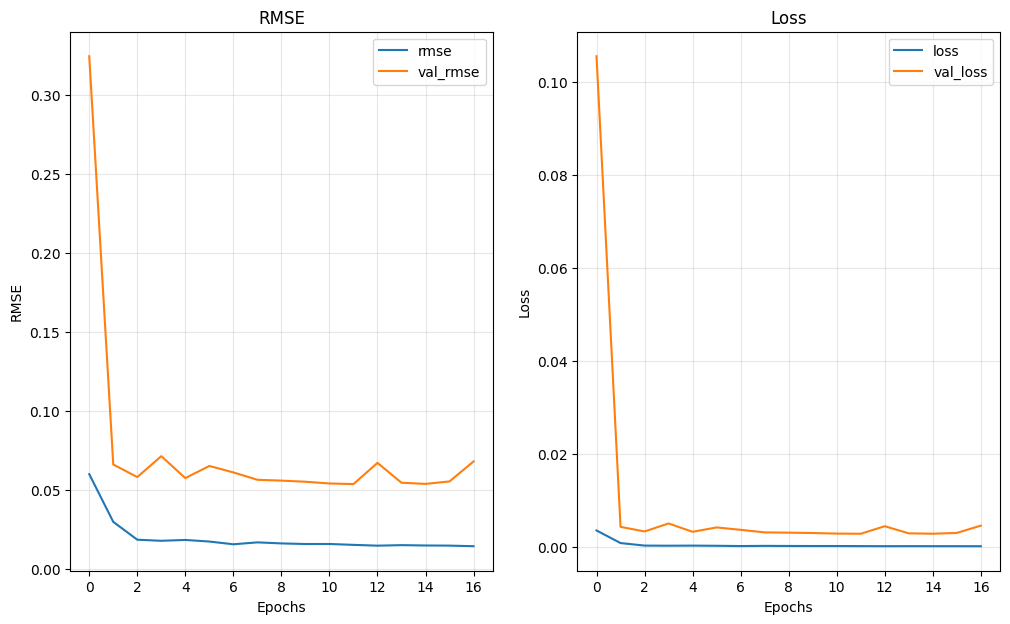

In [27]:
fig = plt.figure(figsize=(12,7))
fig.add_subplot(121)

# Accuracy
plt.plot(history.epoch, history.history['root_mean_squared_error'], label = "rmse")
plt.plot(history.epoch, history.history['val_root_mean_squared_error'], label = "val_rmse")

plt.title("RMSE")
plt.xlabel("Epochs")
plt.ylabel("RMSE")
plt.grid(alpha=0.3)
plt.legend()


#Adding Subplot 1 (For Loss)
fig.add_subplot(122)

plt.plot(history.epoch, history.history['loss'], label="loss")
plt.plot(history.epoch, history.history['val_loss'], label="val_loss")

plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(alpha=0.3)
plt.legend()

plt.show()

In [28]:
results = model.evaluate(x_test, y_test)
print("test loss , test rmse :", np.round(results, 4))

21/21 [==============================] - 0s 7ms/step - loss: 0.0028 - root_mean_squared_error: 0.0527
test loss , test rmse : [0.0028 0.0527]


In [29]:
y_pred = model.predict(x_test)

21/21 [==============================] - 1s 6ms/step


**Evaluation metrics**

In [30]:
score = r2_score(y_test, y_pred)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 76.0%


In [61]:
score = mean_absolute_error(y_test, y_pred)
print("The Mean Absolute Error of our Model is {}".format(round(score, 4)))

The Mean Absolute Error of our Model is 0.0572


In [31]:
score = mean_squared_error(y_test, y_pred)
print("The Mean Squared Error of our Model is {}".format(round(score, 4)))

The Mean Squared Error of our Model is 0.0028


In [32]:
score = np.sqrt(mean_squared_error(y_test, y_pred))
print("The Root Mean Squared Error of our Model is {}".format(round(score, 4)))

The Root Mean Squared Error of our Model is 0.0527


**Hyperparameter Tuning Strategy**

In [33]:
def hyperparameter_tuning_strategy(config, x_train, y_train, x_test, y_test):
  additional_layer, neurons, batch_size, dropout = config
  possible_combinations = list(itertools.product(additional_layer, neurons, batch_size, dropout))
  print("*"*25)
  print(f"Possible No.of Combinations : {possible_combinations}")
  print("*"*25)
  hist = []
  for i in range(len(possible_combinations)):
    print("*"*25)
    print(f"Combination : {i+1}")
    print("*"*25)
    additional_layer, neurons, batch_size, dropout = possible_combinations[i]
    model = Sequential()
    model.add(LSTM(units=neurons, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2]), activation = "relu"))
    model.add(Dropout(dropout))
    if additional_layer:
      model.add(LSTM(units=neurons, return_sequences=True))
      model.add(Dropout(dropout))
    model.add(LSTM(units=neurons, return_sequences=False))
    model.add(Dropout(dropout))
    model.add(Dense(units=1, activation='linear'))
    model.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
    early_stops = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
    file_path = 'best_model.h5'
    model_check = ModelCheckpoint(file_path, monitor='val_loss', mode='min', verbose=1, save_best_only=True)
    model.fit(x_train, y_train, validation_split=0.3, epochs=40, batch_size=batch_size, callbacks=[early_stop, model_check], verbose=0)
    train_loss, train_rmse = model.evaluate(x_train, y_train, verbose=0)
    test_loss, test_rmse = model.evaluate(x_test, y_test, verbose=0)
    hist.append(list((additional_layer, neurons, batch_size, dropout, train_loss, train_rmse, test_loss, test_rmse)))
    print(f"Combination : {i+1} -> {possible_combinations[i]} train_rmse : {train_rmse} test_rmse : {test_rmse}")
    print("*"*25)
    print("*"*25)
  return hist



In [34]:
config = [[False,True], [16, 32], [8, 16, 32], [0.2]]

hist = hyperparameter_tuning_strategy(config, x_train, y_train, x_test, y_test)

*************************
Possible No.of Combinations : [(False, 16, 8, 0.2), (False, 16, 16, 0.2), (False, 16, 32, 0.2), (False, 32, 8, 0.2), (False, 32, 16, 0.2), (False, 32, 32, 0.2), (True, 16, 8, 0.2), (True, 16, 16, 0.2), (True, 16, 32, 0.2), (True, 32, 8, 0.2), (True, 32, 16, 0.2), (True, 32, 32, 0.2)]
*************************
*************************
Combination : 1
*************************

Epoch 1: val_loss improved from inf to 0.00359, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss did not improve from 0.00359

Epoch 3: val_loss did not improve from 0.00359

Epoch 4: val_loss did not improve from 0.00359

Epoch 5: val_loss did not improve from 0.00359

Epoch 6: val_loss did not improve from 0.00359
Epoch 6: early stopping
Combination : 1 -> (False, 16, 8, 0.2) train_rmse : 0.06308086961507797 test_rmse : 0.06384702771902084
*************************
*************************
*************************
Combination : 2
*************************

Epoch 1: val_loss improved from inf to 0.00342, saving model to best_model.h5

Epoch 2: val_loss did not improve from 0.00342

Epoch 3: val_loss did not improve from 0.00342

Epoch 4: val_loss did not improve from 0.00342

Epoch 5: val_loss did not improve from 0.00342

Epoch 6: val_loss did not improve from 0.00342
Epoch 6: early stopping
Combination : 2 -> (False, 16, 16, 0.2) train_rmse : 0.05109250918030739 test_rmse : 0.05663565918803215
*************************
*************************
************

In [35]:
hist = pd.DataFrame(hist, columns=["Additional Layer", "Neurons", "Batch Size", "Drop Out", "Train Loss", "Train RMSE", "Test Loss", "Test RMSE"])
hist = hist.sort_values(by=["Test RMSE"], ascending=True)
hist

,Additional Layer,Neurons,Batch Size,Drop Out,Train Loss,Train RMSE,Test Loss,Test RMSE
5,False,32,32,0.2,0.001995,0.044669,0.001745,0.041769
10,True,32,16,0.2,0.002133,0.046181,0.001797,0.042395
11,True,32,32,0.2,0.001798,0.042397,0.001992,0.044630
3,False,32,8,0.2,0.002864,0.053516,0.002129,0.046140
4,False,32,16,0.2,0.002907,0.053912,0.002886,0.053726
1,False,16,16,0.2,0.002610,0.051093,0.003208,0.056636
2,False,16,32,0.2,0.002769,0.052626,0.003947,0.062825
0,False,16,8,0.2,0.003979,0.063081,0.004076,0.063847
6,True,16,8,0.2,0.006903,0.083085,0.006028,0.077639
8,True,16,32,0.2,0.004295,0.065535,0.006219,0.078861


In [36]:
print("*"*25)
print(f"----Best Combination---- \n Additonal Layer = {hist.iloc[0,0]}\n Neurons = {hist.iloc[0,1]}\n Batch Size = {hist.iloc[0,2]}\n Drop Out = {hist.iloc[0,3]}\n")
print("*"*25)
print("*"*25)
before_rmse = np.round(results, 4)[1]
after_rmse = np.round(hist.iloc[0, -1], 4)
print(f'Results Before Tunning:\n Test Set RMSE: {before_rmse}\n')
print(f'Results After Tunning:\n Test Set RMSE: {after_rmse}\n')
print(f'{np.round((before_rmse-after_rmse)*100/before_rmse)}% Improvement')

*************************
----Best Combination---- 
 Additonal Layer = False
 Neurons = 32
 Batch Size = 32
 Drop Out = 0.2

*************************
*************************
Results Before Tunning:
 Test Set RMSE: 0.0527

Results After Tunning:
 Test Set RMSE: 0.0418

21.0% Improvement


In [37]:
additional_layer, neurons, batch_size, dropout = list(hist.iloc[0, :-4])

In [38]:
model = Sequential()
model.add(LSTM(units=neurons, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2]), activation = "relu"))
model.add(Dropout(dropout))

if additional_layer:
    model.add(LSTM(units=neurons, return_sequences=True))
    model.add(Dropout(dropout))

model.add(LSTM(units=neurons, return_sequences=False))
model.add(Dropout(dropout))
model.add(Dense(units=1, activation='linear'))
model.compile(optimizer='adam', loss='mse')

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

file_path = 'best_model.h5'

model_check = ModelCheckpoint(file_path, monitor='val_loss', mode='min', verbose=1, save_best_only=True)

model.fit(x_train, y_train, validation_split=0.3, epochs=40, batch_size=batch_size, callbacks=[early_stop, model_check], verbose=0)


Epoch 1: val_loss improved from inf to 0.00337, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss did not improve from 0.00337

Epoch 3: val_loss did not improve from 0.00337

Epoch 4: val_loss improved from 0.00337 to 0.00300, saving model to best_model.h5

Epoch 5: val_loss did not improve from 0.00300

Epoch 6: val_loss did not improve from 0.00300

Epoch 7: val_loss did not improve from 0.00300

Epoch 8: val_loss did not improve from 0.00300

Epoch 9: val_loss did not improve from 0.00300
Epoch 9: early stopping


**Evaluation metrics**

In [39]:
results = model.evaluate(x_test, y_test)
print("test loss , test rmse :", np.round(results, 4))

21/21 [==============================] - 0s 8ms/step - loss: 0.0043
test loss , test rmse : 0.0043


In [40]:
y_pred = model.predict(x_test)

21/21 [==============================] - 1s 7ms/step


In [41]:
score = r2_score(y_test, y_pred)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 62.0%


In [62]:
score = mean_absolute_error(y_test, y_pred)
print("The Mean Absolute Error of our Model is {}".format(round(score, 4)))

The Mean Absolute Error of our Model is 0.0572


In [42]:
score = mean_squared_error(y_test, y_pred)
print("The Mean Squared Error of our Model is {}".format(round(score, 4)))

The Mean Squared Error of our Model is 0.0043


In [43]:
score = np.sqrt(mean_squared_error(y_test, y_pred))
print("The Root Mean Squared Error of our Model is {}".format(round(score, 4)))

The Root Mean Squared Error of our Model is 0.0658


**Plot - Scaled Data - Closing Price vs Predicted Closing Price**

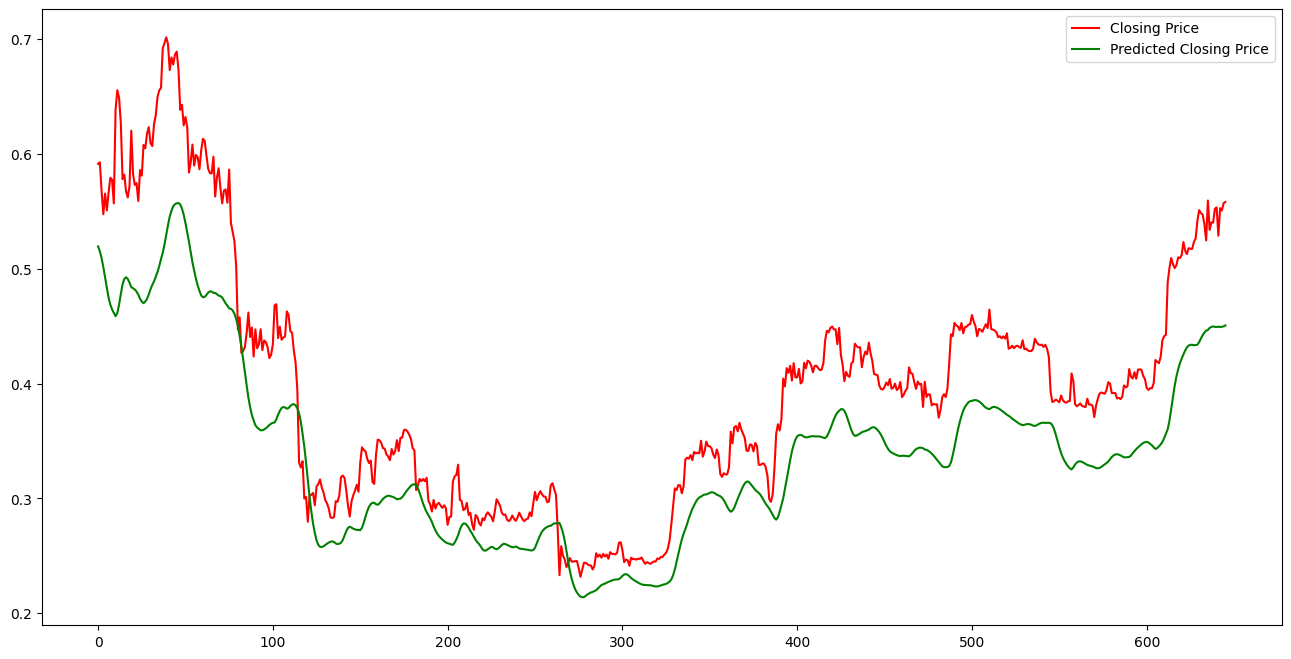

In [44]:
plt.figure(figsize=(16,8), dpi= 100, facecolor='w', edgecolor='k')

plt.plot(y_test, color='red', label = 'Closing Price')
plt.plot(y_pred, color='green', label = 'Predicted Closing Price')
plt.legend(loc='best')
plt.title("Scaled Data - Closing Price vs Predicted Closing Price - Test Dataset")
plt.show()

In [45]:
data_x.shape, data_y.shape

((3332, 25, 2), (3332, 1))

In [57]:
pred_data_y = model.predict(data_x)

105/105 [==============================] - 1s 12ms/step


**Plot - Scaled Data - Closing Price vs Predicted Closing Price - Overall Dataset**

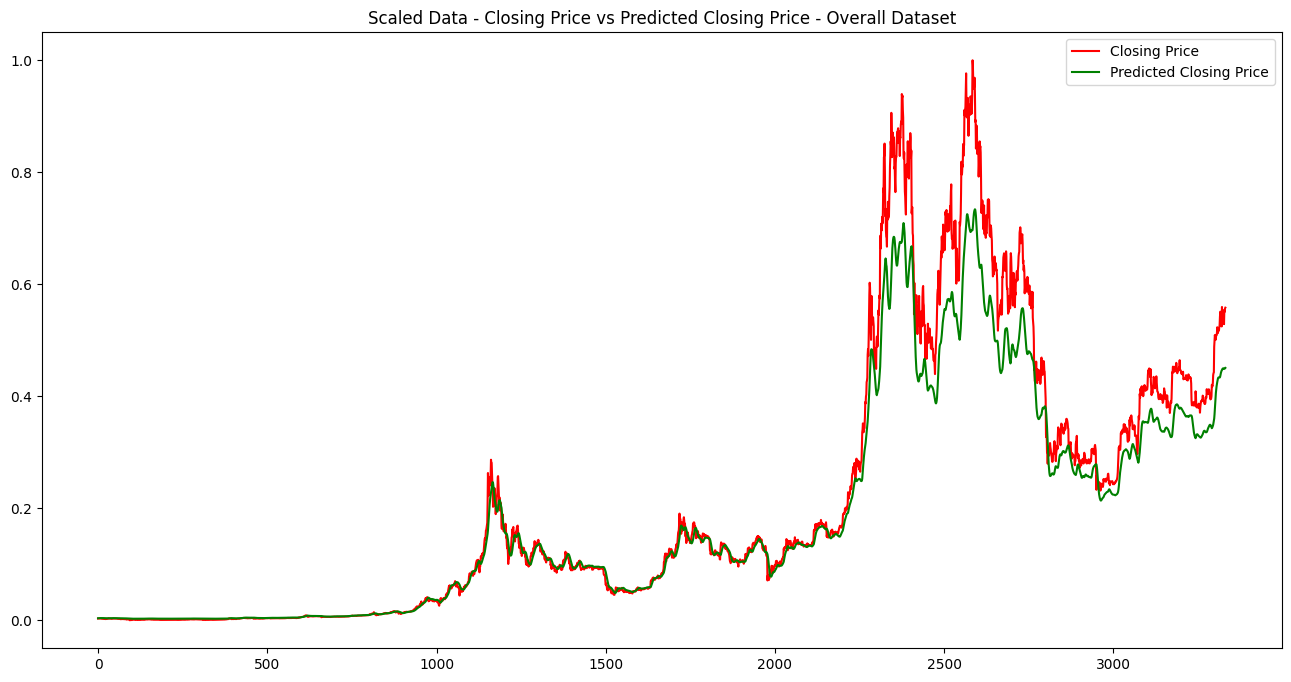

In [58]:
plt.figure(figsize=(16,8), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(data_y, color='red', label = 'Closing Price')
plt.plot(pred_data_y, color='green', label = 'Predicted Closing Price')
plt.legend(loc='best')
plt.title("Scaled Data - Closing Price vs Predicted Closing Price - Overall Dataset")
plt.show()

**Inverting the Min-Max Scaler - Reverting to Original Values**

In [47]:
new_data = [list((i[0],0)) for i in data_y]
data = scalar.inverse_transform(new_data)
overall_data = [i for i, j in data]

In [48]:
overall_data[:5]

[378.549011, 390.414001, 400.869995, 394.77301, 382.556]

In [49]:
new_data = [list((i[0],0)) for i in pred_data_y]
overall_data = scalar.inverse_transform(new_data)
pred_overall_data = [i for i, j in data]

In [50]:
pred_overall_data[:5]

[424.510185541374,
 425.125365344367,
 426.8669731318651,
 429.6580643580133,
 432.8250918236971]

In [51]:
df = pd.DataFrame(overall_data, columns=['Close'])

In [52]:
df['Date']=list(dataframe.iloc[25:,0])

In [53]:
df['Pred Close'] = pred_overall_data

In [54]:
df.head()

,Close,Date,Pred Close
0,378.549011,2014-10-12,424.510186
1,390.414001,2014-10-13,425.125365
2,400.869995,2014-10-14,426.866973
3,394.773010,2014-10-15,429.658064
4,382.556000,2014-10-16,432.825092


**Plot - Original Closing Price vs Predicted Closing Price - Overall Dataset - Inverted to Original Values**

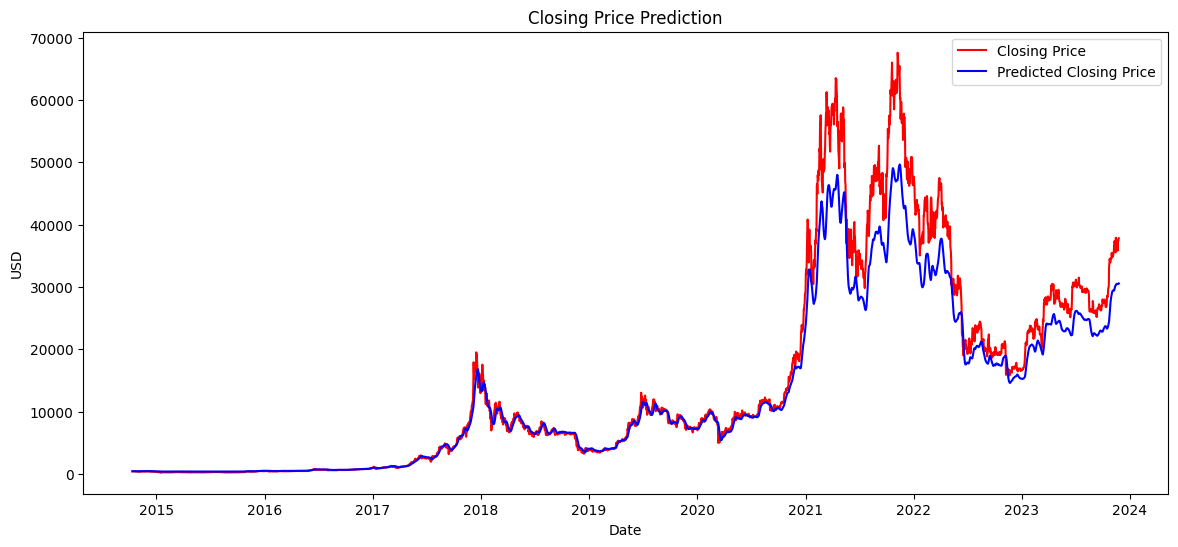

In [55]:
plt.figure(figsize=(14,6), dpi= 100, facecolor='w', edgecolor='k')

plt.plot(df['Date'], df['Close'], color='red', label = 'Closing Price')
plt.plot(df['Date'], df['Pred Close'], color='blue', label = 'Predicted Closing Price')
plt.xlabel('Date')
plt.ylabel('USD')
plt.title("Original Closing Price vs Predicted Closing Price - Overall Dataset")
plt.legend(loc='best')
plt.show()

**Results - Conclusion**

**From the above plot we can see our model is able to predict the general trend
of moving up and down but falls short when prediction the the accurate high and
lows**